# Astro 9

# Lecture 3: Functions

### Pre-loaded functions

In [1]:
import numpy as np

##using a pre-loaded function you are already familiar with
x = np.sqrt(16)
print(x)

4.0


In [2]:
y = np.abs(-24)
print(y)

24


### User defined functions

If the function we need doesn't exist, we can create one. In order to do so, we need to provide:
-  a list of arguments
-  the algorithm of the function
-  the return value

The basic structure of a function is the following:

In [3]:
def MyFunction( x ):
    y = x            # Actually quite useless
    return y

print( MyFunction(3) ) 

3


In [4]:
y = MyFunction(173)
print(y**2)

29929


Notice:
-  the colon at the end of the function declaration
-  the indentation
-  the <font color=blue>return</font> command at the end of the function body

**Example: $\sin{(x)}/x$**

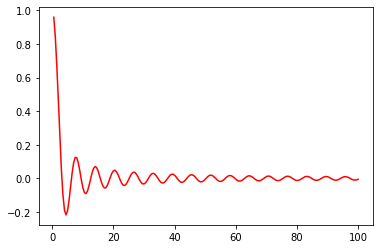

In [6]:
import matplotlib.pyplot as plt # we need this for drawing

def SinXoverX( x ):  # declaration
    y = np.sin(x)/x  # implementation
    return y         # return

x = np.linspace( 0.5, 100., 200 ) # generate 200 points evenly distributed between 0.5 and 100.
y = SinXoverX(x)

plt.plot( x, y, 'r-' )

**Example: function with multiple arguments**

In [7]:
def distance( x, y ):
    return abs(x-y) # It's a very simple calculation, so I can implement it directly in the return statement

print( distance( 2., 4. ) )

2.0


**Required and optional arguments**

Python functions can have two types of arguments: required and optional. Required arguments have no default value and must be passed by the user. Optional arguments have a default value which is used if not specified by the user.
For example, let's rewrite the <font color=blue>distance</font> function with the second argument as optional:

In [8]:
def distance( x, y=0. ):
    return abs(x-y)

print( distance( 2., 4. ) )
print( distance( 1. ) )

2.0
1.0


## Some Fun Functional Examples

### Local vs Global variables

In [9]:
x = 5
def giveMeY():
    global x                    # pull this from global scope
    print (x)
    y = 10
    x = 7                       # change value of global variable
    print ('x=',x,'y=',y)
    return y

print ('x before function:',x)
a = giveMeY()
print(a)
print ('x after function:',x)

x before function: 5
5
x= 7 y= 10
10
x after function: 7


In [10]:
x = 5
def test():
#    print('x inside the function = ',x)
    y = 10
    x = 8                   # assignment operator creates a local copy with the same name ! Beware !!!
    print ('x inside function:',x)
#    print(xx)
#    xxx=5
    return

print ('x before function:',x)
test()
print ('x after function:',x)
#print(xxx)

x before function: 5
x inside function: 8
x after function: 5


Functions can be passed into other functions, stored in lists or tuples. This can produce some neat code

2.75
[3 5]


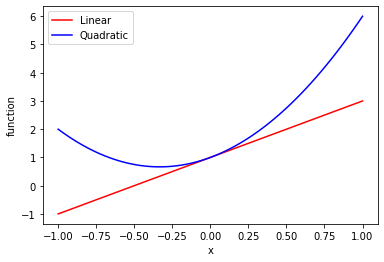

In [11]:
def lin(x):
    '''Compute polynomal of 1st degree, parameters p0,p1 are global'''
    global p0,p1             # didn't I say this was a bad idea ?
    return p0+p1*x

def sq(x):
    global p0, p1, p2        
    return p0+p1*x+p2*x*x    # why didn't I write x**2 ?

#define global parameters
p0 = 1
p1 = 2
p2 = 3

print (sq(0.5))
print(lin(np.array((1,2))))

# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# produce a plot
x = np.linspace(-1,1,100)
plt.plot(x,lin(x),'r-')
plt.plot(x,sq(x),'b-')
plt.xlabel('x')
plt.ylabel('function')
plt.legend(['Linear','Quadratic'],loc=2)
plt.show()

### Beware of unintended consequences in functions taking lists !

In [12]:
def sortedList(inputList):
    myList = inputList
    myList.sort(reverse=True) 
    return myList


list1 = [1,4,5,10]
print ('Original list = ',list1)
list2 = sortedList(list1)
print ('New list = ',list2)
print ('Original list = ',list1)   # huh, what happened ? 

Original list =  [1, 4, 5, 10]
New list =  [10, 5, 4, 1]
Original list =  [10, 5, 4, 1]


In [13]:
'''This version preserves the original list'''
from copy import copy

def sortedList(inputList):
    myList = copy(inputList)
    myList.sort(reverse=True) 
#    myList = sorted(inputList,reverse=True) # this is a short-hand: returns new sorted list, preserving the original
    return myList


list1 = [1,4,5,10]
print ('Original list = ',list1)
list2 = sortedList(list1)
print ('New list = ',list2)
print ('Original list = ',list1)    


Original list =  [1, 4, 5, 10]
New list =  [10, 5, 4, 1]
Original list =  [1, 4, 5, 10]


Is this what you would expect ? 

There are two issues:
1. Variables of type <tt>list</tt> are only "handles" -- they are really references/pointers to a place in memory where (the first element of the) list is stored. So assignment myList = inputList does not create a new list and copy the contents; it simply copies the handle. Now you have two references, all pointed to the same list in memory. When you operate on the list through one reference, the contents pointed to by the other reference changes also ! 
Note that this behavior is different from simple data types, like ints, floats, and strings
1. Variables of type <tt>list</tt> are passed into functions "by reference" (in C/C++ language), so modifications changes to the list inside the function modify the list outside the function